In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

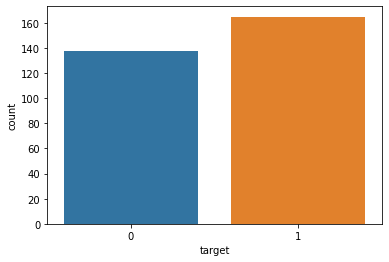

In [6]:
sns.countplot(x=df.target);

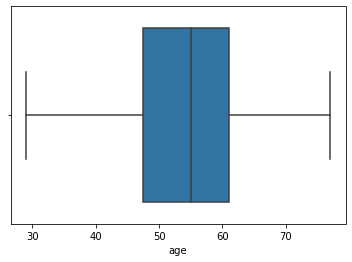

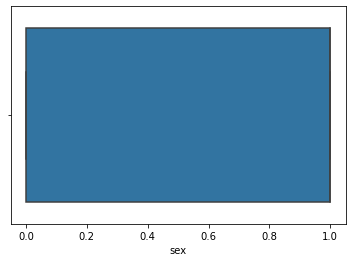

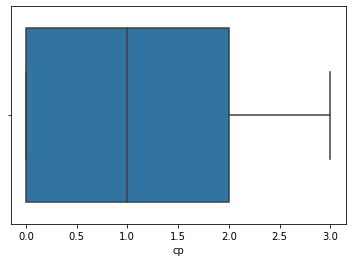

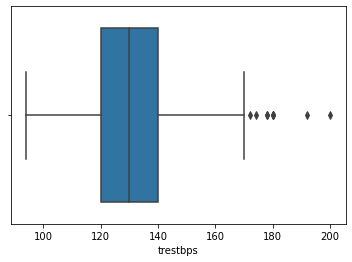

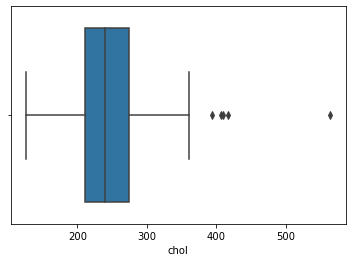

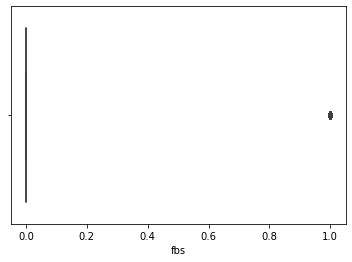

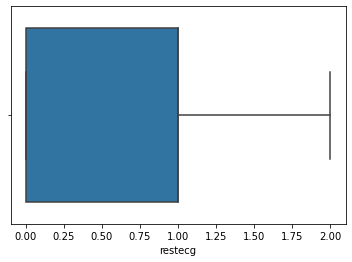

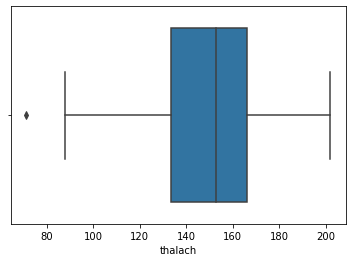

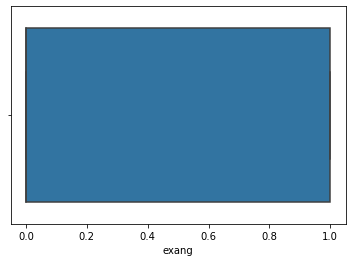

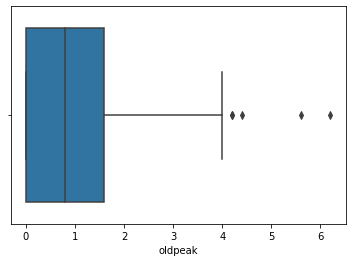

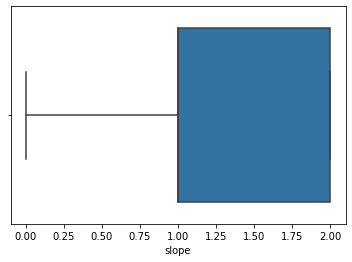

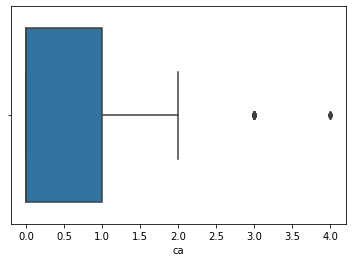

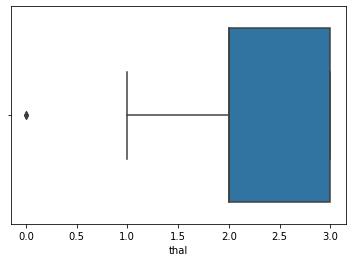

In [7]:
for i in df.columns.drop('target'):
    plt.subplots()
    sns.boxplot(x=df[i]);

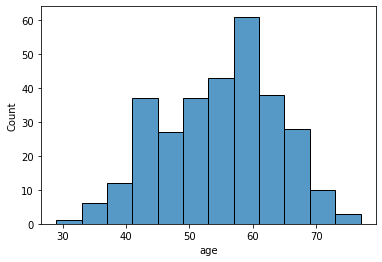

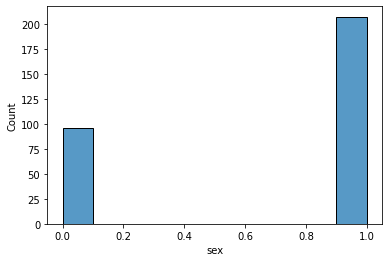

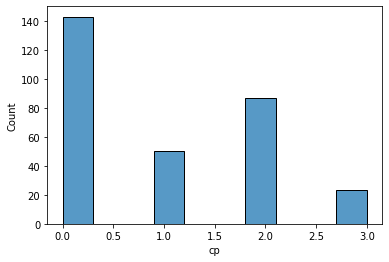

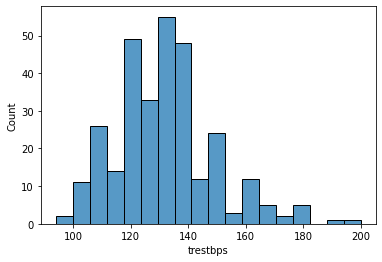

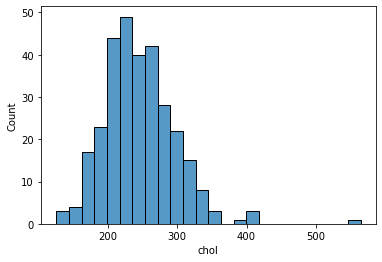

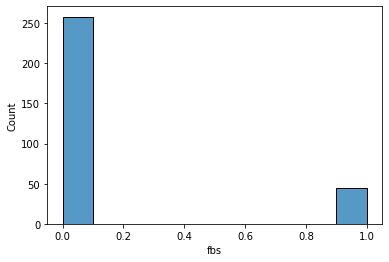

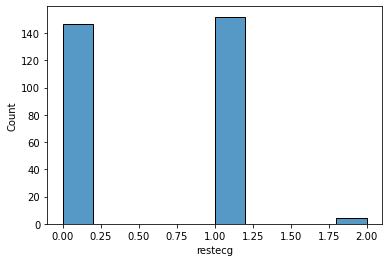

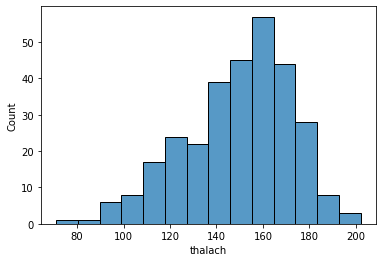

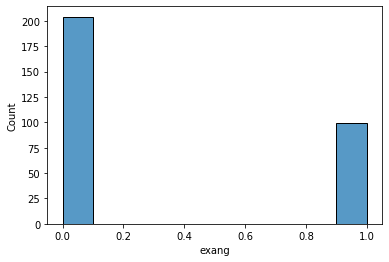

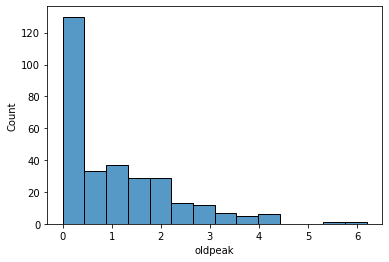

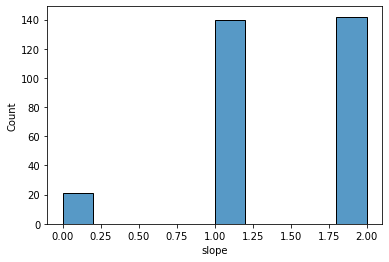

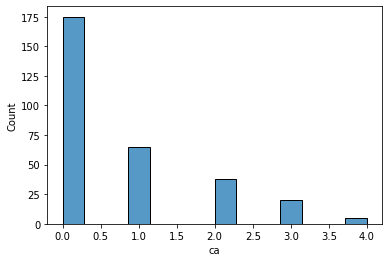

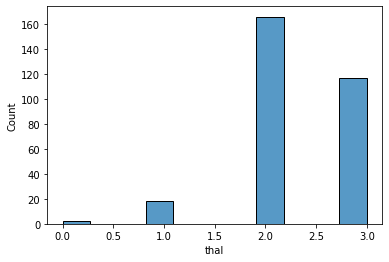

In [8]:
for i in df.columns.drop('target'):
    plt.subplots()
    sns.histplot(x=df[i]);

**Remove outliers**

In [9]:
df = df[df['trestbps'] < 180]

In [10]:
df = df[df['chol'] < 375]

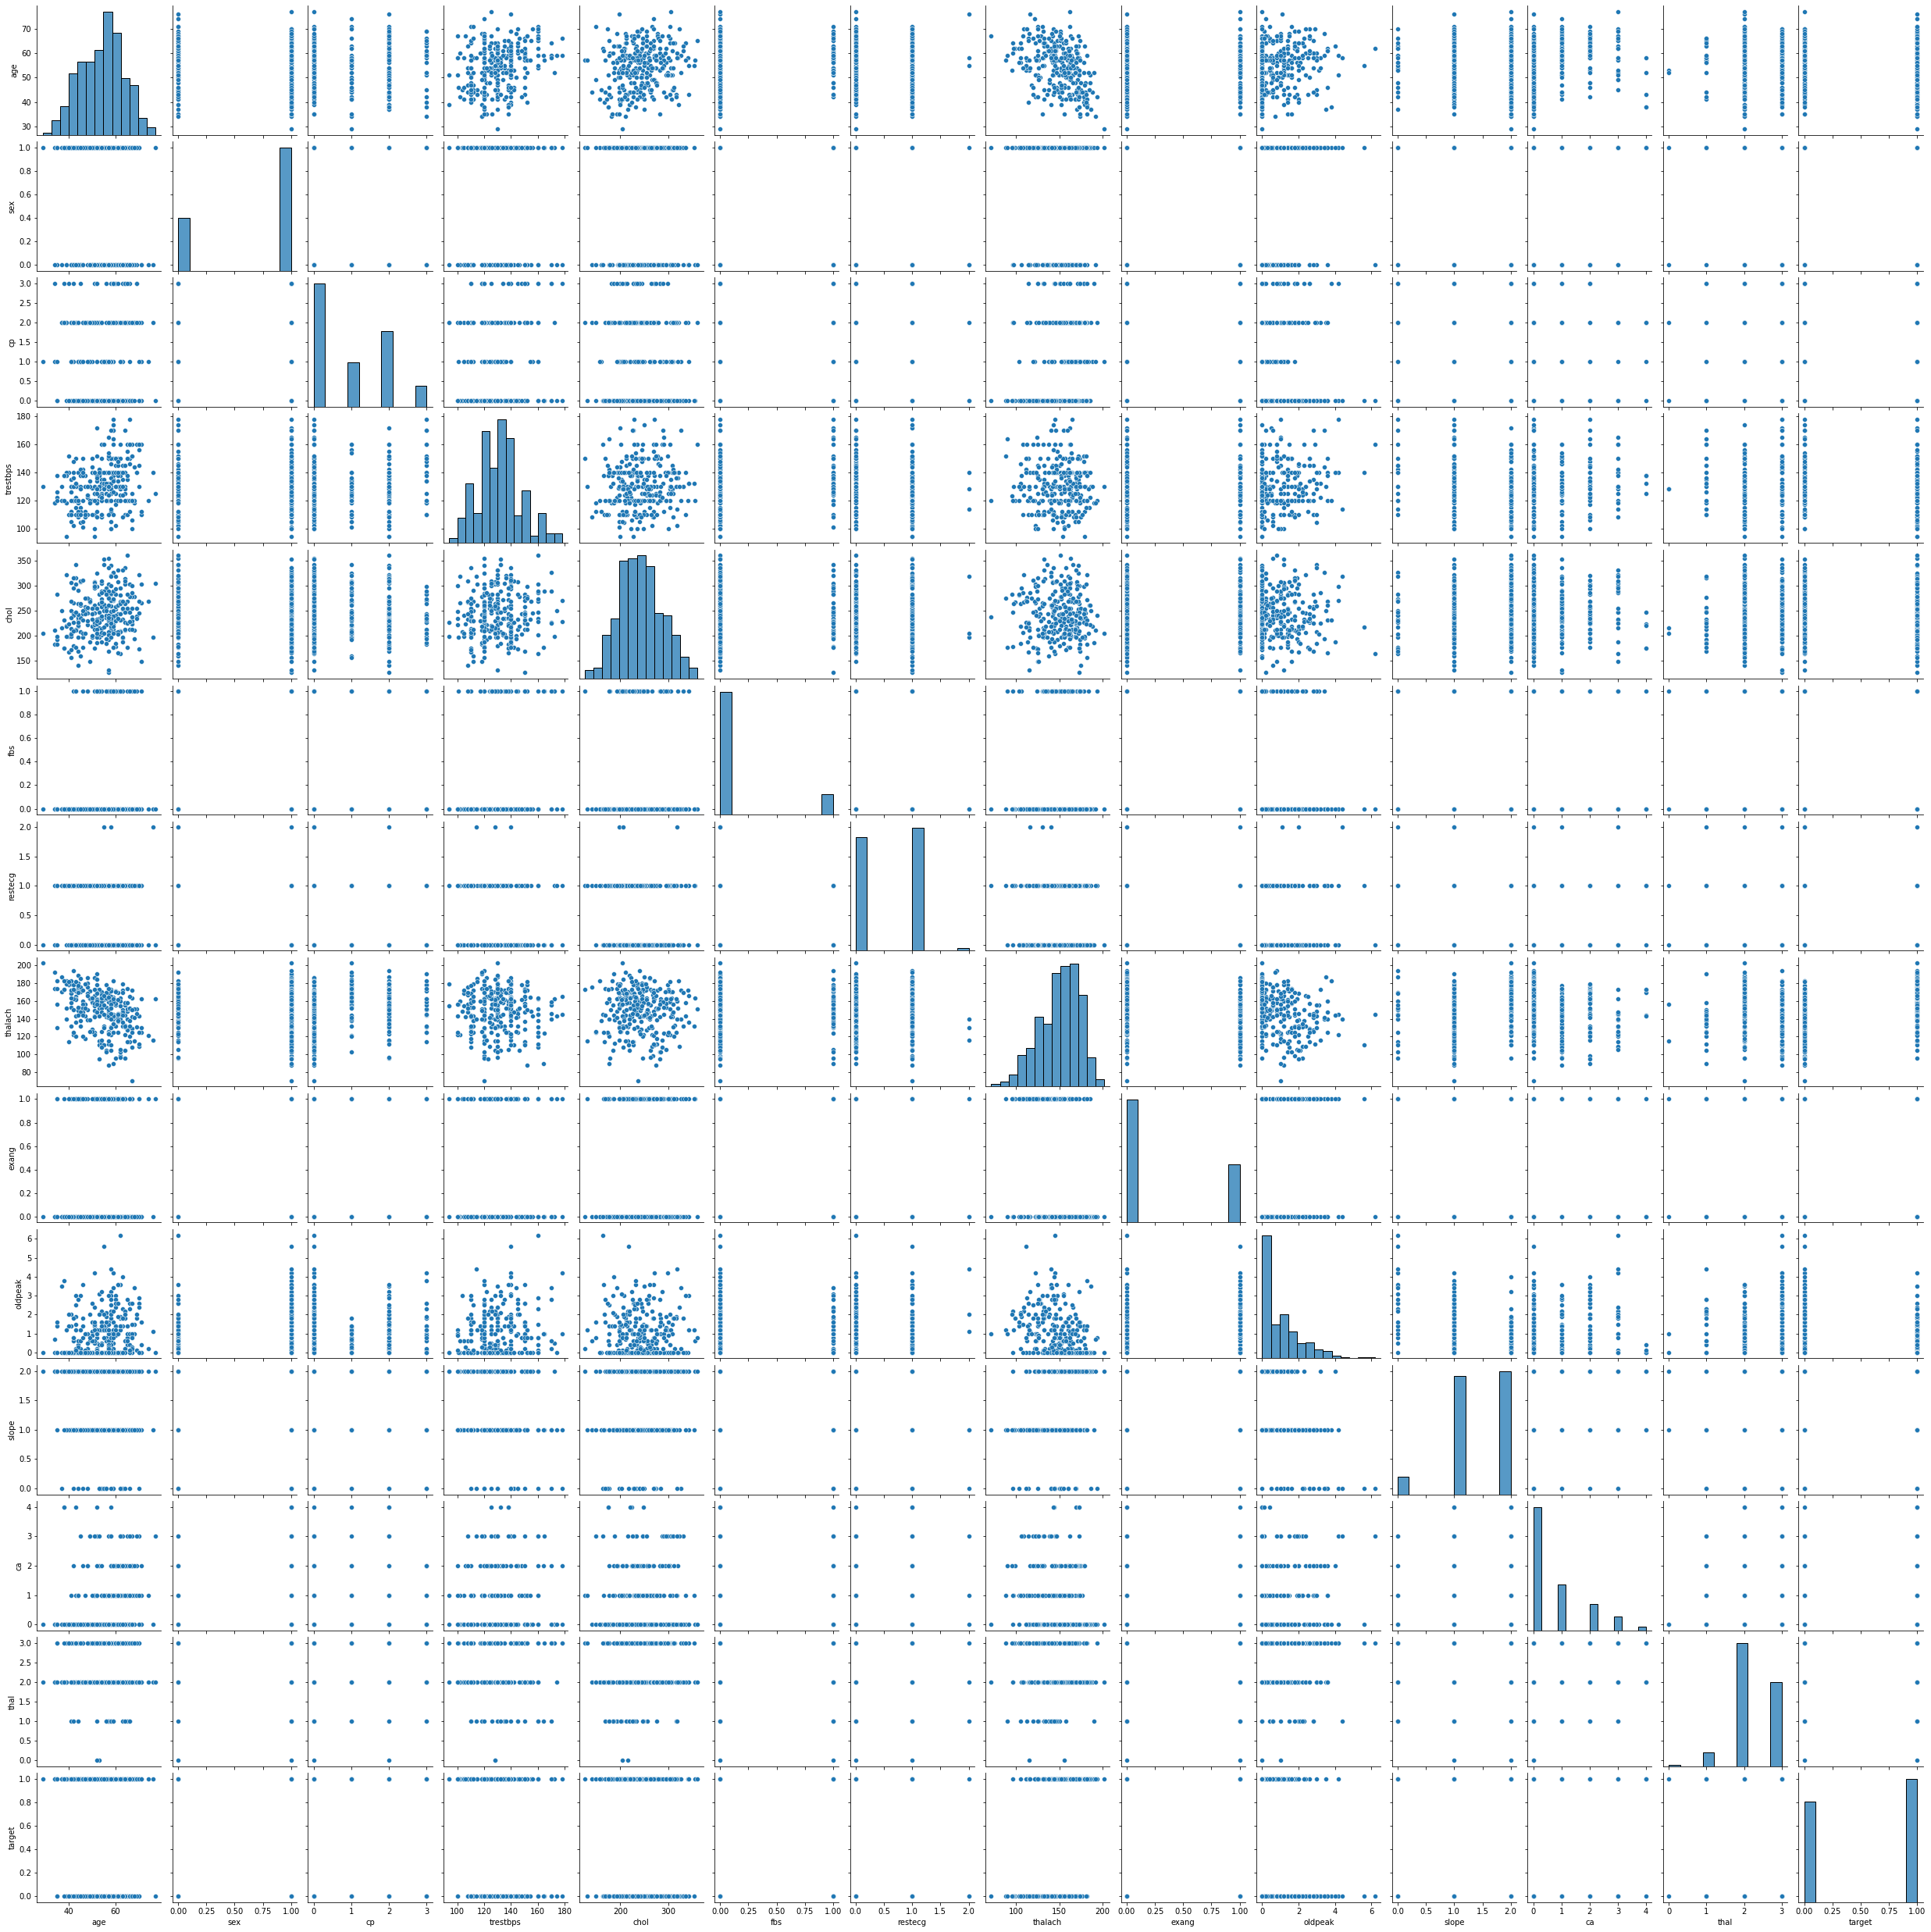

In [11]:
sns.pairplot(df);

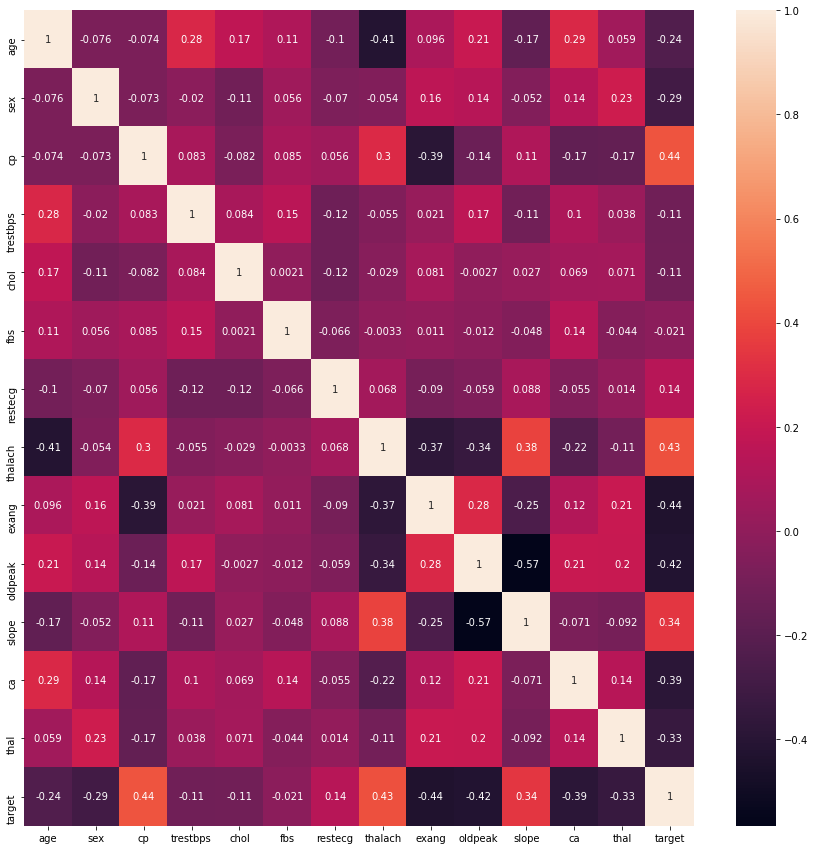

In [12]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr,annot=True);

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns = ['age','trestbps','chol','oldpeak']

for i in columns:
    data = scaler.fit_transform(np.array(df[i]).reshape(-1, 1))
    df[i] = data

**Machine Learning**

In [14]:

X = np.array(df.drop('target',axis=1))
y = df.target.values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=15)
scores.mean()

0.7863157894736842

In [18]:
clf.feature_importances_

array([0.12, 0.04, 0.04, 0.16, 0.12, 0.  , 0.02, 0.18, 0.02, 0.16, 0.04,
       0.08, 0.02])

In [19]:
cols = df.columns.drop('target')

for i in range(len(cols)):
    print(cols[i],clf.feature_importances_[i])

age 0.12
sex 0.04
cp 0.04
trestbps 0.16
chol 0.12
fbs 0.0
restecg 0.02
thalach 0.18
exang 0.02
oldpeak 0.16
slope 0.04
ca 0.08
thal 0.02


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[38  2]
 [ 2 46]]
0.9583333333333334
0.9583333333333334
0.9583333333333334
